In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from csbdeep.utils import normalize
from stardist.models import StarDist2D
from stardist.plot import render_label

from skimage.morphology import remove_small_objects, remove_small_holes
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening, disk

In [2]:
image_paths = sorted(["data/images/"+path for path in os.listdir("data/images") if not path.startswith(".")])
image_paths

['data/images/CTRL_1_M1_3R__0004.tif',
 'data/images/CTRL_4_M6_3L__0008.tif',
 'data/images/E2+DHT_1_M13_3L_0001.tif',
 'data/images/E2+DHT_2_M10_3R_0002.tif',
 'data/images/E2+P4+DHT_1_M7_3L_0013.tif',
 'data/images/E2+P4+DHT_1_M7_3L_0019.tif',
 'data/images/E2+P4_2_M9_3R_0003.tif',
 'data/images/E2+P4_3_M12_3R_0002.tif',
 'data/images/E2_1_M8_3L_0011.tif',
 'data/images/E2_2_M11_4R_0001.tif']

In [3]:
mask_paths = sorted(["data/masks/"+path for path in os.listdir("data/masks") if not path.startswith(".")])
mask_paths

['data/masks/CTRL_1_M1_3R__0004_mask.tif',
 'data/masks/CTRL_4_M6_3L__0008_mask.ome.tif',
 'data/masks/E2+DHT_1_M13_3L_0001_mask.ome.tif',
 'data/masks/E2+DHT_2_M10_3R_0002_mask.ome.tif',
 'data/masks/E2+P4+DHT_1_M7_3L_0013_mask.ome.tif',
 'data/masks/E2+P4+DHT_1_M7_3L_0019_mask.ome.tif',
 'data/masks/E2+P4_2_M9_3R_0003_mask.ome.tif',
 'data/masks/E2+P4_3_M12_3R_0002_mask.ome.tif',
 'data/masks/E2_1_M8_3L_0011_mask.ome.tif',
 'data/masks/E2_2_M11_4R_0001_mask.ome.tif']

Text(0.5, 1.0, 'mask')

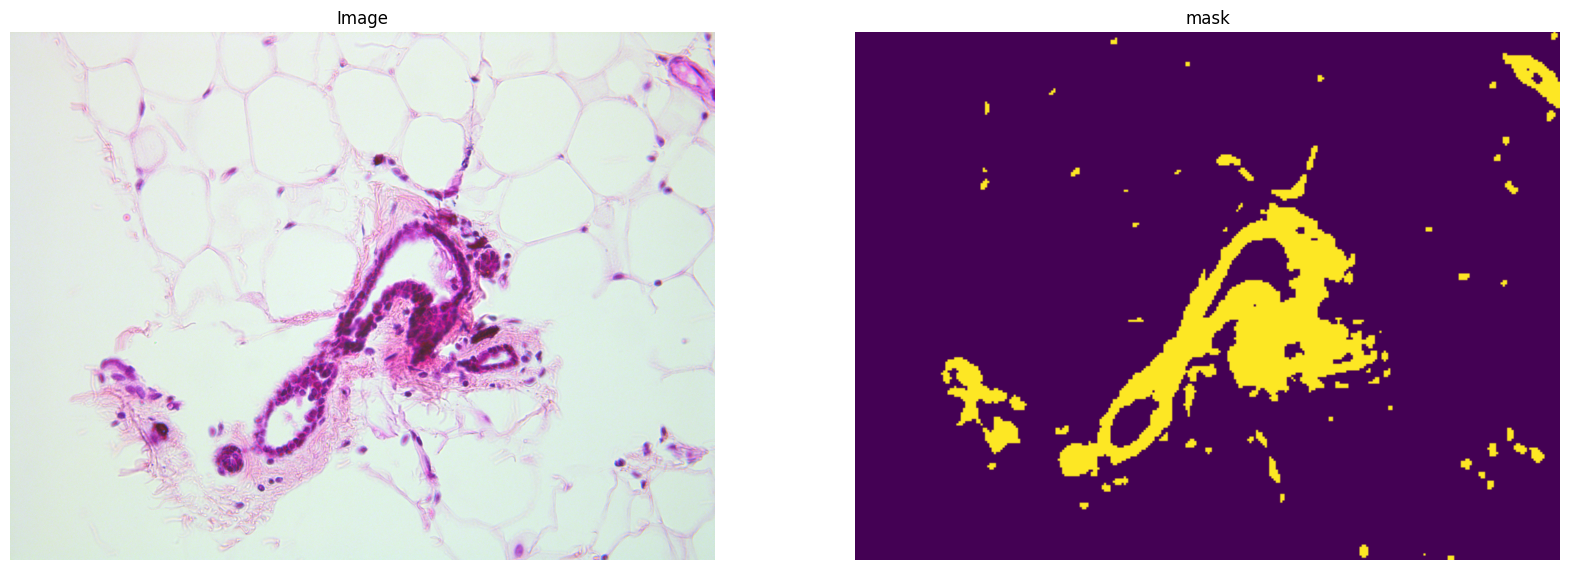

In [4]:
images = list(map(tifffile.imread, image_paths))
masks = list(map(tifffile.imread, mask_paths))
data = list(zip(images, masks))

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(data[0][0])
plt.axis("off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(data[0][1])
plt.axis("off")
plt.title("mask")

In [5]:
def clean_mask(mask):
    mask = mask.astype(bool)
    mask = remove_small_objects(mask, min_size=200)
    mask = remove_small_holes(mask, area_threshold=10)
    rad = disk(radius=2)
    smoothed_mask = binary_closing(mask, rad)
    return smoothed_mask

In [1]:
# cleaned_masks = []

# for image, mask in data:
#     cleaned_mask = clean_mask(mask)
#     cleaned_masks.append(cleaned_mask)

#     plt.figure(figsize=(20, 10))

#     plt.subplot(1, 2, 1)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title("Mask before cleaning")

#     plt.subplot(1, 2, 2)
#     plt.imshow(cleaned_mask)
#     plt.axis("off")
#     plt.title("Mask after cleaning")

#     plt.show()

In [7]:
from skimage.transform import resize

def cut_out_image(image, mask):
    resized_mask = resize(mask, (image.shape[0], image.shape[1]), order=0, preserve_range=True)
    cut_image = image.copy()
    resized_mask = resized_mask.astype(bool)
    cut_image[~resized_mask] = 255
    return cut_image

In [2]:
# data = list(zip(images, cleaned_masks))

# for image, mask in data:
#     cut_image = cut_out_image(image, mask)

#     plt.figure(figsize=(20, 10))

#     plt.subplot(1, 2, 1)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title("Image")

#     plt.subplot(1, 2, 2)
#     plt.imshow(cut_image)
#     plt.axis("off")
#     plt.title("Cut out image")

#     plt.show()

In [13]:
import cv2 as cv

In [14]:
def threshold_image(img, thresh_params):
    """
    Apply different type of threshold to a given image + threshold value
    """

    """
    Apply a threshold on a given image.
    :param image: Image to enhance contrast
    :param thresh_params: Parameters of the thresholdinf
    :return: img_thresh: thresholded image
    """    
    
    thre, img_thresh = cv.threshold(img, thresh_params["thresh"], thresh_params["value"], thresh_params["ttype"])
    if thresh_params["ttype"] == cv.THRESH_BINARY+cv.THRESH_OTSU:
        print(f"Otsu threshold value is: {thre}")
    return img_thresh